# Sentiment analysis on IMDB review data

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [0]:
df_imbd = pd.read_csv("imdb.csv")
df_imbd.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


## Supervised learning using Count Vectorizer and TF-IDF with Logistic Regression and Bernoulli Naive Bayes method

Convert Dependent variable into numeric value

In [0]:
df_imbd.Class[df_imbd.Class == 'P'] = 1
df_imbd.Class[df_imbd.Class == 'N'] = 0
df_imbd = df_imbd.dropna(how = 'any')
df_imbd.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


Train Test data split using SKlearn library

In [0]:
from sklearn.model_selection import train_test_split
X = df_imbd.Text
Y = df_imbd.Class
Corpus_train, Corpus_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(Corpus_train.shape,Corpus_test.shape,Y_train.shape,Y_test.shape)


(6374,) (2125,) (6374,) (2125,)


Using binary `CountVectorizer()` and a binary `TfidfVectorizer()`

In [0]:
#CountVectorizer with English stopwords and N-gram: 1-2
vectorizer = CountVectorizer(stop_words="english", ngram_range=(1,2), binary = True)
X_train_CV = vectorizer.fit(Corpus_train).transform(Corpus_train)
X_test_CV = vectorizer.transform(Corpus_test)

print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print("X_train:\n{}".format(repr(X_train_CV)))
print("X_test: \n{}".format(repr(X_test_CV)))

feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 568253
X_train:
<6374x568253 sparse matrix of type '<class 'numpy.int64'>'
	with 1252518 stored elements in Compressed Sparse Row format>
X_test: 
<2125x568253 sparse matrix of type '<class 'numpy.int64'>'
	with 255557 stored elements in Compressed Sparse Row format>
Number of features: 568253


In [0]:
#TfidfVectorizer with English stopwords and N-gram: 1-2
vectorizer_TF = TfidfVectorizer(stop_words="english", ngram_range=(1,2), binary = True)

X_train_TF = vectorizer_TF.fit(Corpus_train).transform(Corpus_train)
X_test_TF = vectorizer_TF.transform(Corpus_test)

print("Vocabulary size: {}".format(len(vectorizer_TF.vocabulary_)))
print("X_train:\n{}".format(repr(X_train_TF)))
print("X_test: \n{}".format(repr(X_test_TF)))

feature_names = vectorizer_TF.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 568253
X_train:
<6374x568253 sparse matrix of type '<class 'numpy.float64'>'
	with 1252518 stored elements in Compressed Sparse Row format>
X_test: 
<2125x568253 sparse matrix of type '<class 'numpy.float64'>'
	with 255557 stored elements in Compressed Sparse Row format>
Number of features: 568253


Using `LogisticRegression()` and `BernoulliNB()` models for Supervised classification of Count Vectorizer as well TF-IDF models

In [0]:
Y_train=Y_train.astype('int')

# Logistic Regression 
model_LR_CV = LogisticRegression()
model_LR_CV.fit(X_train_CV, Y_train)
model_LR_TF = LogisticRegression()
model_LR_TF.fit(X_train_TF, Y_train)


# Bernoulli Naive Bayes
model_BNB_CV = BernoulliNB()
model_BNB_CV.fit(X_train_CV, Y_train)
model_BNB_TF = BernoulliNB()
model_BNB_TF.fit(X_train_TF, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
LR_CV_pred = model_LR_CV.predict(X_test_CV)
AUC_LR_CV = metrics.roc_auc_score(LR_CV_pred, Y_test)
LR_CV_fpr, LR_CV_tpr, _ = metrics.roc_curve(LR_CV_pred, Y_test)

LR_TF_pred = model_LR_TF.predict(X_test_TF)
AU_LR_TF = metrics.roc_auc_score(LR_TF_pred, Y_test)
LR_TF_fpr, LR_TF_tpr, _ = metrics.roc_curve(LR_TF_pred, Y_test)

BNB_CV_pred = model_BNB_CV.predict(X_test_CV)
AUC_BNB_CV = metrics.roc_auc_score(BNB_CV_pred, Y_test)
BNB_CV_fpr, BNB_CV_tpr, _ = metrics.roc_curve(BNB_CV_pred, Y_test)

BNB_TF_pred = model_BNB_TF.predict(X_test_TF)
AUC_BNB_TF = metrics.roc_auc_score(BNB_TF_pred, Y_test)
BNB_TF_fpr, BNB_TF_tpr, _ = metrics.roc_curve(BNB_TF_pred, Y_test)

print(AUC_LR_CV ,AU_LR_TF ,AUC_BNB_CV ,AUC_BNB_TF)
print("Logistic Regression with Count Vectorizer = ",AUC_LR_CV )
print("Logistic Regression with TfidfVectorizer = ",AU_LR_TF )
print("BernoulliNB with Count Vectorizer = ",AUC_BNB_CV)
print("BernoulliNB with TfidfVectorizer = ",AUC_BNB_TF )

0.8693357601044505 0.8635189912887573 0.8405989167476088 0.8405989167476088
Logistic Regression with Count Vectorizer =  0.8693357601044505
Logistic Regression with TfidfVectorizer =  0.8635189912887573
BernoulliNB with Count Vectorizer =  0.8405989167476088
BernoulliNB with TfidfVectorizer =  0.8405989167476088


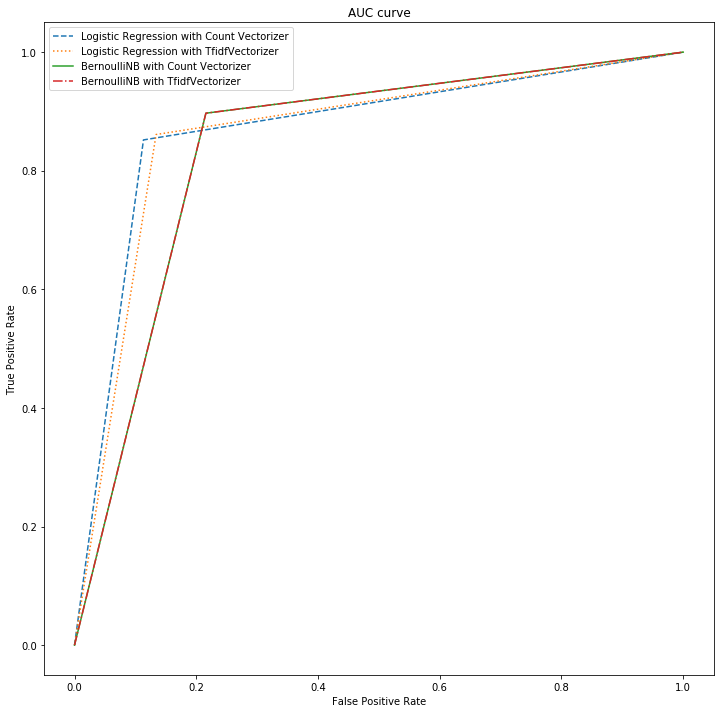

In [0]:
# plot the roc curve for the model
plt.plot(LR_CV_fpr, LR_CV_tpr, linestyle='--', label='Logistic Regression with Count Vectorizer')
plt.plot(LR_TF_fpr, LR_TF_tpr, linestyle=':', label='Logistic Regression with TfidfVectorizer')
plt.plot(BNB_CV_fpr, BNB_CV_tpr, linestyle='-', label='BernoulliNB with Count Vectorizer')
plt.plot(BNB_TF_fpr, BNB_TF_tpr, linestyle='-.', label='BernoulliNB with TfidfVectorizer')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title("AUC curve")
plt.show()

Logistic Regression with Count Vectorizer performs better Sentiment analysis than other models with AUC of 0.8693

## Unsupervised learning

In [0]:
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn import cluster

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

# Let's create our feature vector as Kmeans works with numerical values only
# thus we need to convert our text data into numeric features in some way which should 
# prove usful to our learning algorithm and it can easily find pattern in it.
# So, i will be using polarity score of the extracted adjectives as our feature

def create_polarity_vector(all_adjectives):
    # NLTK Vader sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    #Taking compound score as one feature, (compund score = -ve indicates negative sentiments)
    #(compund score = +ve indicates positive sentiments, ie compound value is normalization b/w +ve and -ve)
    feature_vector=[1 if sid.polarity_scores(i)['compound']>=0 else -1 for i in all_adjectives]
    
    return feature_vector


# utility function to read text file
def polarity_sets_file(input_file):
    with open(input_file, 'r') as f:
        input_text = f.read()
        return input_text

# utility function to extract all adjectives from text document
def extract_adjectives(text):
    tokenized_text= nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(tokenized_text)
    all_adjectives = list({i[0] for i in tagged_text if i[1] == 'JJ'})
    return all_adjectives

# Cleaning up text 
def clean_text(text):    
    
    #stopword removal
    stop_word=list(stopwords.words('english'))
    toke=list(text.split(' '))
    text = ' '.join([i for i in toke if i not in stop_word])
    
    #punctutaion removal
    t_lator=str.maketrans('','',string.punctuation)
    text=text.translate(t_lator)
    remove_digits = str.maketrans('', '', string.digits)
    text = text.translate(remove_digits)    
    
    #removing special symbol
    for i in '“”—':
        text = text.replace(i, ' ')
        
    return text


text = df_imbd['Text'].to_string(index=False)

# Reading our file
#text = polarity_sets_file('test.txt')
#print("text = ", (text))
# cleaning our text data
text = clean_text(text)

# Getting adjectieves from our document
adjectives = extract_adjectives(text)

# Preparing our feature vector
features = create_polarity_vector(adjectives)

# Making clusters using KMeans
feature_ = np.array(features).reshape(-1,1)
kmeans = cluster.KMeans(n_clusters=2, n_init=200)
kmeans.fit(feature_)
labels = kmeans.predict(feature_)

# Identifying positive and negative terms

type1_terms,type2_terms = [], []

for i,j in zip(adjectives,labels):
    if j == 0 :
        type1_terms.append(i)
    else:
        type2_terms.append(i)
        
print(type1_terms)

print(type2_terms)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
['Milanese', 'democratic', 'standup', 'red', 'nose', 'human', 'amateur', 'eligible', 'waist', 'gritty', 'itfor', 'Zodiac', 'technical', 'call', 'meticulous', 'inhabit', 'fro', 'Cary', 'sublime', 'former', 'theatre', 'endofdays', 'middle', 'downtown', 'free', 'twen', 'universal', 'dis', 'Good', 'bold', 'elaborate', 'unenv', 'Sean', 'vein', 'bottom', 'secret', 'spoiler', 'shoc', 'overwhelming', 'different', 'maj', 'perfect', 'unforgettable', 'Possible',

In [0]:
print(type1_terms)

['Milanese', 'democratic', 'standup', 'red', 'nose', 'human', 'amateur', 'eligible', 'waist', 'gritty', 'itfor', 'Zodiac', 'technical', 'call', 'meticulous', 'inhabit', 'fro', 'Cary', 'sublime', 'former', 'theatre', 'endofdays', 'middle', 'downtown', 'free', 'twen', 'universal', 'dis', 'Good', 'bold', 'elaborate', 'unenv', 'Sean', 'vein', 'bottom', 'secret', 'spoiler', 'shoc', 'overwhelming', 'different', 'maj', 'perfect', 'unforgettable', 'Possible', 'relax', 'handsome', 're', 'Based', 'meI', 'Lucian', 'ac', 'agnostic', 'puzzle', 'grown', 'inept', 'orginal', 'Hollow', 'gold', 'excellent', 'martial', 'Freudian', 'hopele', 'unmemorable', 'Usual', 'mere', 'make', 'Preposterous', 'rich', 'suspe', 'many', 'standout', 'Sure', 'accurate', 'kin', 'saturday', 'na', 'intere', 'fairy', 'ski', 'obvious', 'title', 'equal', 'glamorous', 'shoots', 'hoodlum', 'initial', 'eddie', 'dry', 'believe', 'spectacular', 'thedishonor', 'afraid', 'raid', 'gentle', 'sat', 'recent', 'Special', 'couch', 'logical',

In [0]:
print(type2_terms)

['trite', 'grim', 'worse', 'trick', 'ominous', 'terrible', 'funeral', 'critical', 'unhappy', 'forced', 'critic', 'weak', 'shame', 'worst', 'unfortunate', 'guilty', 'Screwball', 'teased', 'painful', 'lose', 'suspect', 'negative', 'offensive', 'cry', 'unbiased', 'dire', 'Notorious', 'hard', 'crazy', 'frustrated', 'useless', 'sad', 'questionable', 'ridiculous', 'ruin', 'skeptical', 'mindless', 'crazed', 'unworthy', 'Worst', 'arrogant', 'poor', 'dreadful', 'tricky', 'obsessive', 'dubious', 'eerie', 'low', 'dumb', 'Repetitive', 'scary', 'Sadly', 'screwy', 'flop', 'hell', 'cruel', 'desperate', 'odd', 'illegal', 'evil', 'ludicrous', 'uptight', 'Painful', 'Horrendous', 'awful', 'steal', 'naive', 'accident', 'indifferent', 'alone', 'vile', 'suspicious', 'failed', 'stop', 'insipid', 'sappy', 'violated', 'stupid', 'disappointing', 'bloody', 'wrong', 'wasted', 'inadequate', 'erroneous', 'bitter', 'Stupid', 'hate', 'maniacal', 'harsh', 'distrust', 'sick', 'unimpressive', 'bizarre', 'idiotic', 'horr